In [4]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt



In [10]:
!wget https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg -O cat.jpg


--2026-02-01 20:11:30--  https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279603 (273K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 273.05K  1.63MB/s    in 0.2s    

2026-02-01 20:11:30 (1.63 MB/s) - ‘cat.jpg’ saved [279603/279603]



In [11]:
model=models.resnet18(pretrained=True)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
features=[]
def hook_fn(module,input,output):
    features.append(output)


model.layer1[0].conv1.register_forward_hook(hook_fn)

In [13]:
img = Image.open("cat.jpg").convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

x = transform(img).unsqueeze(0)


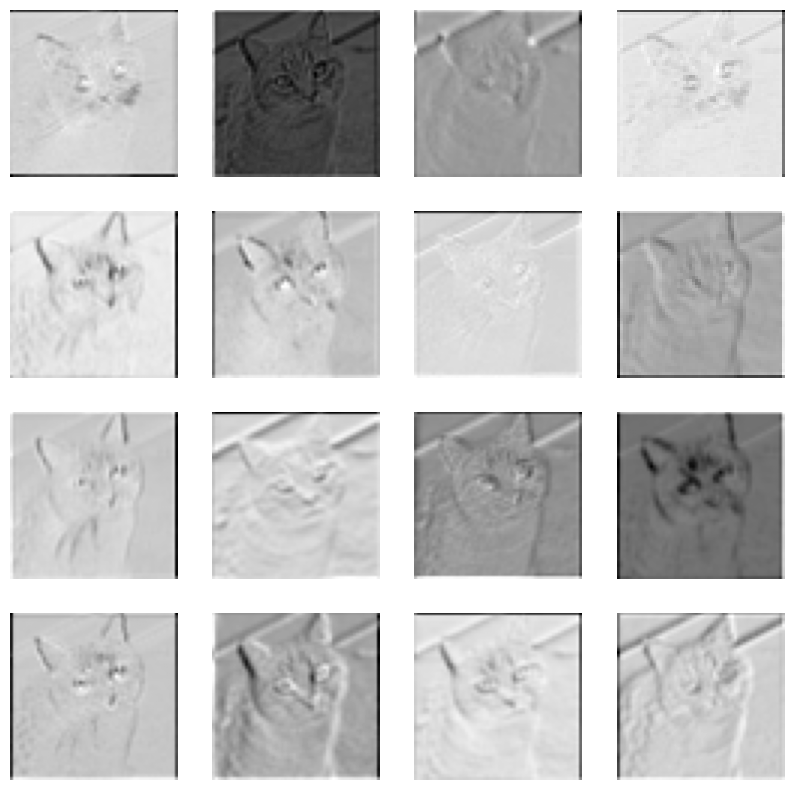

In [14]:
with torch.no_grad():
    model(x)

fmap=features[0][0]
plt.figure(figsize=(10,10))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(fmap[i],cmap='gray')
    plt.axis('off')

plt.show()